In [2]:
# import Libraries:

import pandas as pd
import numpy as np

import seaborn as sns

import matplotlib.pyplot as plt
%matplotlib inline

# Create Results Dataframe

In [64]:
# Load monthly data:

def load_data():  
    return pd.read_csv('../Drugs.csv')  

data = load_data()

In [65]:
data.head()

,q1,q2,q3,q4,q5,q6,q7,q8,q9,q10
0,4 or more times a week,7 to 9,Daily or almost daily,Daily or almost daily,Daily or almost daily,Daily or almost daily,Daily or almost daily,Daily or almost daily,"Yes, during the last year","Yes, during the last year"
1,4 or more times a week,1 or 2,Monthly,Never,Never,Never,Never,Never,No,"Yes, during the last year"
2,Never,1 or 2,Never,Never,Never,Never,Never,Never,No,"Yes, during the last year"
3,2-4 times a month,1 or 2,Never,Never,Never,Daily or almost daily,Never,Never,No,No
4,2-4 times a month,1 or 2,Monthly,Never,Never,Never,Never,Never,No,"Yes, during the last year"


In [66]:
# Mapping questions and answers with values as per severity:

data.q1[data.q1.str.strip() == 'Never'] = 0
data.q1[data.q1.str.strip() == 'Monthly or less'] = 1
data.q1[data.q1.str.strip() == '2-4 times a month'] = 2
data.q1[data.q1.str.strip() == '2-3 times a week'] = 3
data.q1[data.q1.str.strip() == '4 or more times a week'] = 4

data.q2[data.q2.str.strip() == '1 or 2'] = 0
data.q2[data.q2.str.strip() == '3 or 4'] = 1
data.q2[data.q2.str.strip() == '5 or 6'] = 2
data.q2[data.q2.str.strip() == '7 to 9'] = 3
data.q2[data.q2.str.strip() == '10 or more'] = 4

data.q3[data.q3.str.strip() == 'Never'] = 0
data.q3[data.q3.str.strip() == 'Less than monthly'] = 1
data.q3[data.q3.str.strip() == 'Monthly'] = 2
data.q3[data.q3.str.strip() == 'Weekly'] = 3
data.q3[data.q3.str.strip() == 'Daily or almost daily'] = 4

data.q4[data.q4.str.strip() == 'Never'] = 0
data.q4[data.q4.str.strip() == 'Less than monthly'] = 1
data.q4[data.q4.str.strip() == 'Monthly'] = 2
data.q4[data.q4.str.strip() == 'Weekly'] = 3
data.q4[data.q4.str.strip() == 'Daily or almost daily'] = 4

data.q5[data.q5.str.strip() == 'Never'] = 0
data.q5[data.q5.str.strip() == 'Less than monthly'] = 1
data.q5[data.q5.str.strip() == 'Monthly'] = 2
data.q5[data.q5.str.strip() == 'Weekly'] = 3
data.q5[data.q5.str.strip() == 'Daily or almost daily'] = 4

data.q6[data.q6.str.strip() == 'Never'] = 0
data.q6[data.q6.str.strip() == 'Less than monthly'] = 1
data.q6[data.q6.str.strip() == 'Monthly'] = 2
data.q6[data.q6.str.strip() == 'Weekly'] = 3
data.q6[data.q6.str.strip() == 'Daily or almost daily'] = 4

data.q7[data.q7.str.strip() == 'Never'] = 0
data.q7[data.q7.str.strip() == 'Less than monthly'] = 1
data.q7[data.q7.str.strip() == 'Monthly'] = 2
data.q7[data.q7.str.strip() == 'Weekly'] = 3
data.q7[data.q7.str.strip() == 'Daily or almost daily'] = 4

data.q8[data.q8.str.strip() == 'Never'] = 0
data.q8[data.q8.str.strip() == 'Less than monthly'] = 1
data.q8[data.q8.str.strip() == 'Monthly'] = 2
data.q8[data.q8.str.strip() == 'Weekly'] = 3
data.q8[data.q8.str.strip() == 'Daily or almost daily'] = 4

data.q9[data.q9.str.strip() == 'No'] = 0
data.q9[data.q9.str.strip() == 'NaN'] = 0
data.q9[data.q9.str.strip() == 'Yes, but not in the last year'] = 2
data.q9[data.q9.str.strip() == 'NaN'] = 0
data.q9[data.q9.str.strip() == 'Yes, during the last year'] = 4

data.q10[data.q10.str.strip() == 'No'] = 0
data.q10[data.q10.str.strip() == 'NaN'] = 0
data.q10[data.q10.str.strip() == 'Yes, but not in the last year'] = 2
data.q10[data.q10.str.strip() == 'NaN'] = 0
data.q10[data.q10.str.strip() == 'Yes, during the last year'] = 4

print(data[0:50])

   q1 q2 q3 q4 q5 q6 q7 q8 q9 q10
0   4  3  4  4  4  4  4  4  4   4
1   4  0  2  0  0  0  0  0  0   4
2   0  0  0  0  0  0  0  0  0   4
3   2  0  0  0  0  4  0  0  0   0
4   2  0  2  0  0  0  0  0  0   4
5   1  1  0  4  4  0  0  4  2   4
6   2  0  2  0  0  4  0  0  0   0
7   4  0  0  0  0  0  0  0  0   4
8   3  1  2  4  4  4  4  4  2   4
9   1  1  0  0  0  0  0  4  2   4
10  4  3  4  4  4  4  4  4  4   4
11  4  0  2  0  0  0  0  0  0   4
12  0  0  0  0  0  0  0  0  0   4
13  2  0  0  0  0  4  0  0  0   0
14  2  0  2  0  0  0  0  0  0   4
15  1  1  0  4  4  0  0  4  2   4
16  2  0  2  0  0  4  0  0  0   0
17  4  0  0  0  0  0  0  0  0   4
18  3  1  2  4  4  4  4  4  2   4
19  1  1  0  0  0  0  0  4  2   4
20  4  3  4  4  4  4  4  4  4   4
21  4  0  2  0  0  0  0  0  0   4
22  0  0  0  0  0  0  0  0  0   4
23  2  0  0  0  0  4  0  0  0   0
24  2  0  2  0  0  0  0  0  0   4
25  1  1  0  4  4  0  0  4  2   4
26  2  0  2  0  0  4  0  0  0   0
27  4  0  0  0  0  0  0  0  0   4
28  3  1  2  4

/Users/pratikcr7/opt/miniconda3/envs/reporterror/lib/python3.7/site-packages/pandas/core/ops/array_ops.py:253: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  res_values = method(rvalues)


In [68]:
# finding total score for an individual:
data.loc[:,'Total'] = data.sum(numeric_only=False, axis=1)
data.head()

,q1,q2,q3,q4,q5,q6,q7,q8,q9,q10,Total
0,4,3,4,4,4,4,4,4,4,4,39.0
1,4,0,2,0,0,0,0,0,0,4,10.0
2,0,0,0,0,0,0,0,0,0,4,4.0
3,2,0,0,0,0,4,0,0,0,0,6.0
4,2,0,2,0,0,0,0,0,0,4,8.0


In [69]:
# Provide Label: Classify into non addictive : 1, addictive : 2, highly addictive: 3
# I will label them based on the score: 0-13 : Class 1, 14-26 : Class 2, 27-40: Class 3


def label(row):
    if row['Total'] < 14:
        val = 1
    elif row['Total'] >= 14 and row['Total'] < 27:
        val = 2
    else:
        val = 3
    return val

data.loc[:, 'Label'] = data.apply(label, axis=1)

data.head()

,q1,q2,q3,q4,q5,q6,q7,q8,q9,q10,Total,Label
0,4,3,4,4,4,4,4,4,4,4,39.0,3
1,4,0,2,0,0,0,0,0,0,4,10.0,1
2,0,0,0,0,0,0,0,0,0,4,4.0,1
3,2,0,0,0,0,4,0,0,0,0,6.0,1
4,2,0,2,0,0,0,0,0,0,4,8.0,1


# Classification Models:

## Selecting only one feature or question for training:

In [141]:
from sklearn.model_selection import train_test_split

X = data[["q1"]]
print(X.shape)
y = data['Label']
print(y.shape)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=11)

(1032, 1)
(1032,)


## Using various other classifiers which takes time to converge to 100% accuracy, but eventually they all do.

In [142]:
# Prediction based on selecting all 10 feature/quesions or question for training: (Gives us best 100% accuracy)
from sklearn.metrics import accuracy_score 

# Logistic Regression:

from sklearn.linear_model import LogisticRegression

logmodel = LogisticRegression(max_iter=10000)
logmodel.fit(X_train,y_train)
y_pred = logmodel.predict(X_test)
# Model Performance 
print("Accuracy : ", accuracy_score(y_test, y_pred) *  100) 

# KNN Classifier:

from sklearn import neighbors
from sklearn.neighbors import KNeighborsClassifier

clf=neighbors.KNeighborsClassifier()
clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)
# Model Performance 
print("Accuracy : ", accuracy_score(y_test, y_pred) *  100)

# SVM classifier:

from sklearn.svm import SVC
from sklearn.metrics import classification_report

model=SVC()
model.fit(X_train,y_train)
y_pred=model.predict(X_test)
# Model Performance 
print("Accuracy : ", accuracy_score(y_test, y_pred) *  100) 

# RandomForest Classifier:

from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(n_estimators=100)
rfc.fit(X_train, y_train)
rfc_pred = rfc.predict(X_test)
# Model Performance 
print("Accuracy : ", accuracy_score(y_test, rfc_pred) *  100) 

# Gaussian Naive Bayes Classifier:

from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB() 
gnb.fit(X_train, y_train)
y_pred = gnb.predict(X_test)
# Model Performance 
print("Accuracy : ", accuracy_score(y_test, y_pred) *  100) 

Accuracy :  73.22580645161291
Accuracy :  81.61290322580645
Accuracy :  81.61290322580645
Accuracy :  81.61290322580645
Accuracy :  67.74193548387096


## Selecting only 2 feature or question for training:

In [153]:
from sklearn.model_selection import train_test_split

X = data[["q1", "q3"]]
print(X.shape)
y = data['Label']
print(y.shape)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=11)

(1032, 2)
(1032,)


In [154]:
# Prediction based on selecting all 10 feature/quesions or question for training: (Gives us best 100% accuracy)
from sklearn.metrics import accuracy_score 

# Logistic Regression:

from sklearn.linear_model import LogisticRegression

logmodel = LogisticRegression(max_iter=10000)
logmodel.fit(X_train,y_train)
y_pred = logmodel.predict(X_test)
# Model Performance 
print("Accuracy : ", accuracy_score(y_test, y_pred) *  100) 

# KNN Classifier:

from sklearn import neighbors
from sklearn.neighbors import KNeighborsClassifier

clf=neighbors.KNeighborsClassifier()
clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)
# Model Performance 
print("Accuracy : ", accuracy_score(y_test, y_pred) *  100)

# SVM classifier:

from sklearn.svm import SVC
from sklearn.metrics import classification_report

model=SVC()
model.fit(X_train,y_train)
y_pred=model.predict(X_test)
# Model Performance 
print("Accuracy : ", accuracy_score(y_test, y_pred) *  100) 

# RandomForest Classifier:

from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(n_estimators=100)
rfc.fit(X_train, y_train)
rfc_pred = rfc.predict(X_test)
# Model Performance 
print("Accuracy : ", accuracy_score(y_test, rfc_pred) *  100) 

# Gaussian Naive Bayes Classifier:

from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB() 
gnb.fit(X_train, y_train)
y_pred = gnb.predict(X_test)
# Model Performance 
print("Accuracy : ", accuracy_score(y_test, y_pred) *  100) 

Accuracy :  82.9032258064516
Accuracy :  91.29032258064517
Accuracy :  91.29032258064517
Accuracy :  91.29032258064517
Accuracy :  73.54838709677419


## Selecting 3 features/questions for training:

In [155]:
from sklearn.model_selection import train_test_split

X = data[["q1","q2","q3"]]
print(X.shape)
y = data['Label']
print(y.shape)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=11)

(1032, 3)
(1032,)


In [156]:
# Prediction based on selecting all 10 feature/quesions or question for training: (Gives us best 100% accuracy)
from sklearn.metrics import accuracy_score 

# Logistic Regression:

from sklearn.linear_model import LogisticRegression

logmodel = LogisticRegression(max_iter=10000)
logmodel.fit(X_train,y_train)
y_pred = logmodel.predict(X_test)
# Model Performance 
print("Accuracy : ", accuracy_score(y_test, y_pred) *  100) 

# KNN Classifier:

from sklearn import neighbors
from sklearn.neighbors import KNeighborsClassifier

clf=neighbors.KNeighborsClassifier()
clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)
# Model Performance 
print("Accuracy : ", accuracy_score(y_test, y_pred) *  100)

# SVM classifier:

from sklearn.svm import SVC
from sklearn.metrics import classification_report

model=SVC()
model.fit(X_train,y_train)
y_pred=model.predict(X_test)
# Model Performance 
print("Accuracy : ", accuracy_score(y_test, y_pred) *  100) 

# RandomForest Classifier:

from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(n_estimators=100)
rfc.fit(X_train, y_train)
rfc_pred = rfc.predict(X_test)
# Model Performance 
print("Accuracy : ", accuracy_score(y_test, rfc_pred) *  100) 

# Gaussian Naive Bayes Classifier:

from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB() 
gnb.fit(X_train, y_train)
y_pred = gnb.predict(X_test)
# Model Performance 
print("Accuracy : ", accuracy_score(y_test, y_pred) *  100) 

Accuracy :  91.29032258064517
Accuracy :  91.29032258064517
Accuracy :  91.29032258064517
Accuracy :  91.29032258064517
Accuracy :  91.29032258064517


## Selecting 4 features/questions for training:

In [157]:
from sklearn.model_selection import train_test_split

X = data[["q1","q2","q3","q4"]]
print(X.shape)
y = data['Label']
print(y.shape)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=11)

(1032, 4)
(1032,)


In [158]:
# Prediction based on selecting all 10 feature/quesions or question for training: (Gives us best 100% accuracy)
from sklearn.metrics import accuracy_score 

# Logistic Regression:

from sklearn.linear_model import LogisticRegression

logmodel = LogisticRegression(max_iter=10000)
logmodel.fit(X_train,y_train)
y_pred = logmodel.predict(X_test)
# Model Performance 
print("Accuracy : ", accuracy_score(y_test, y_pred) *  100) 

# KNN Classifier:

from sklearn import neighbors
from sklearn.neighbors import KNeighborsClassifier

clf=neighbors.KNeighborsClassifier()
clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)
# Model Performance 
print("Accuracy : ", accuracy_score(y_test, y_pred) *  100)

# SVM classifier:

from sklearn.svm import SVC
from sklearn.metrics import classification_report

model=SVC()
model.fit(X_train,y_train)
y_pred=model.predict(X_test)
# Model Performance 
print("Accuracy : ", accuracy_score(y_test, y_pred) *  100) 

# RandomForest Classifier:

from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(n_estimators=100)
rfc.fit(X_train, y_train)
rfc_pred = rfc.predict(X_test)
# Model Performance 
print("Accuracy : ", accuracy_score(y_test, rfc_pred) *  100) 

# Gaussian Naive Bayes Classifier:

from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB() 
gnb.fit(X_train, y_train)
y_pred = gnb.predict(X_test)
# Model Performance 
print("Accuracy : ", accuracy_score(y_test, y_pred) *  100) 

Accuracy :  100.0
Accuracy :  100.0
Accuracy :  100.0
Accuracy :  100.0
Accuracy :  100.0


## Selecting all 10 features/questions for training:

In [159]:
from sklearn.model_selection import train_test_split

X = data[["q1","q2","q3","q4", "q5","q6","q7","q8", "q9","q10"]]
print(X.shape)
y = data['Label']
print(y.shape)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=11)

(1032, 10)
(1032,)


In [160]:
# Prediction based on selecting all 10 feature/quesions or question for training: (Gives us best 100% accuracy)
from sklearn.metrics import accuracy_score 

# Logistic Regression:

from sklearn.linear_model import LogisticRegression

logmodel = LogisticRegression(max_iter=10000)
logmodel.fit(X_train,y_train)
y_pred = logmodel.predict(X_test)
# Model Performance 
print("Accuracy : ", accuracy_score(y_test, y_pred) *  100) 

# KNN Classifier:

from sklearn import neighbors
from sklearn.neighbors import KNeighborsClassifier

clf=neighbors.KNeighborsClassifier()
clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)
# Model Performance 
print("Accuracy : ", accuracy_score(y_test, y_pred) *  100)

# SVM classifier:

from sklearn.svm import SVC
from sklearn.metrics import classification_report

model=SVC()
model.fit(X_train,y_train)
y_pred=model.predict(X_test)
# Model Performance 
print("Accuracy : ", accuracy_score(y_test, y_pred) *  100) 

# RandomForest Classifier:

from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(n_estimators=100)
rfc.fit(X_train, y_train)
rfc_pred = rfc.predict(X_test)
# Model Performance 
print("Accuracy : ", accuracy_score(y_test, rfc_pred) *  100) 

# Gaussian Naive Bayes Classifier:

from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB() 
gnb.fit(X_train, y_train)
y_pred = gnb.predict(X_test)
# Model Performance 
print("Accuracy : ", accuracy_score(y_test, y_pred) *  100) 

Accuracy :  100.0
Accuracy :  100.0
Accuracy :  100.0
Accuracy :  100.0
Accuracy :  100.0


# Plot Results

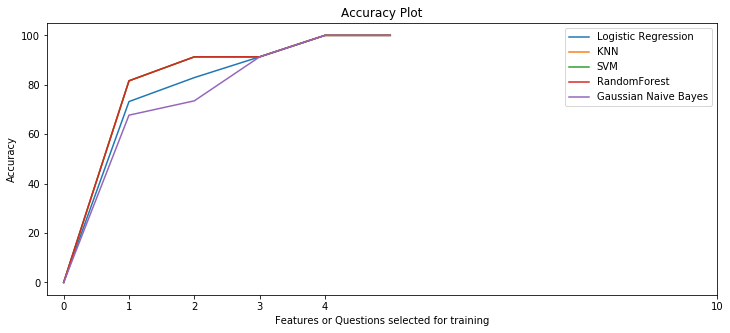

In [174]:
import matplotlib.pyplot as plt

#Plot a line graph
plt.figure(figsize=(12,5))
plt.plot([0, 73.2, 82.9, 91.3, 100, 100], label='Logistic Regression')
plt.plot([0, 81.6, 91.3, 91.3, 100, 100], label='KNN')
plt.plot([0, 81.6, 91.3, 91.3, 100, 100], label='SVM')
plt.plot([0, 81.6, 91.3, 91.3, 100, 100], label='RandomForest')
plt.plot([0, 67.7, 73.5, 91.3, 100, 100], label='Gaussian Naive Bayes')
 
# Add labels and title
plt.title("Accuracy Plot")
plt.xticks([0,1,2,3,4,10])
plt.xlabel("Features or Questions selected for training")
plt.ylabel("Accuracy")

plt.legend()
plt.show()